# Pytorch Workflow Fundamentals

1. Prepare data (Tensors)
2. Building Model (loss function and optimizer + building training loop)
3. Training
4. Inference
5. (Evaluation and Iterative Improvement)
6. Saving and Loading model
7. Putting it all together



In [2]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu117'

### 1. Prepare Data

In [3]:
weight = 0.7
bias = 0.3

# data creation
# X = torch.randn(100, 1) * 10
X = torch.arange(0,1,0.02).unsqueeze(dim=1) # unsqueezed to make tensor otherwise it would be vector
y= weight *X + bias
print(X[:10].squeeze(dim=1),"\n", y[:10].squeeze(dim=1)) # if no unsqueeze used then it would be vector
X[:10] ,y[:10] 


tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800]) 
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
        0.4260])


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
# Data splitting
train_size = int(0.8 * len(X))
X_train,y_train = X[:train_size], y[:train_size]
X_test,y_test = X[train_size:], y[train_size:]

len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

In [5]:
# Let's visaulize the data

def plot_preds(train_data=X_train,train_label=y_train,test_data=X_test,test_label=y_test,preds=None):
    fig = plt.figure(figsize=(8,8))
    plt.scatter(train_data,train_label,c="b",label="Training data")
    plt.scatter(test_data,test_label,c="r",label="Testing data")

    if preds is not None:
        plt.scatter(test_data,preds,c='g',label="Prediction")

    plt.legend(prop={"size":14});

    plt.show()

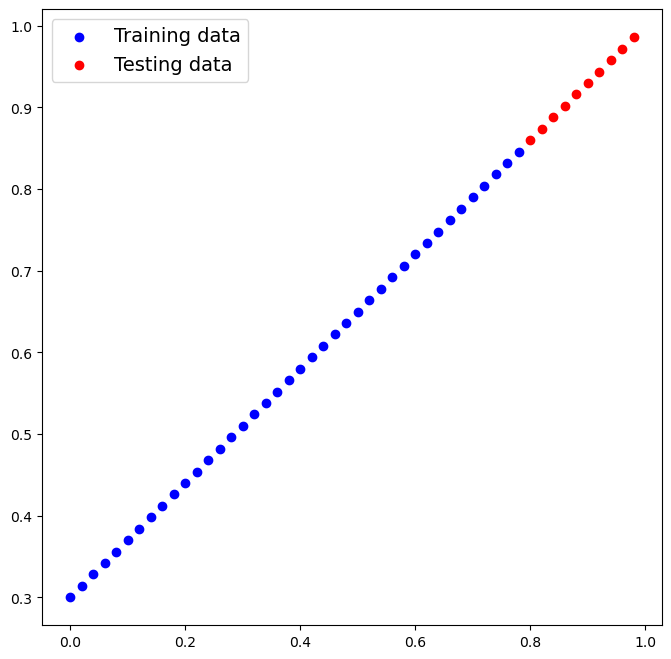

In [6]:
plot_preds()

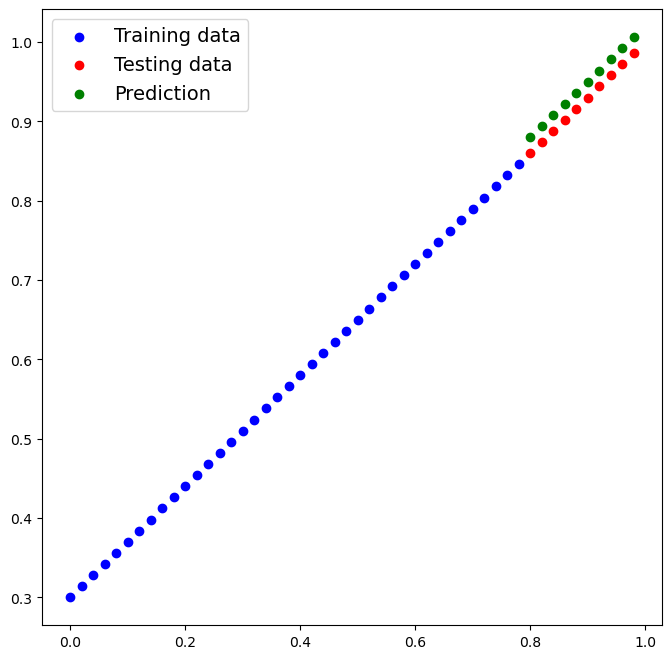

In [7]:
# testing a visualization for sample prediction
# plot_preds(preds=y_test+abs(torch.randn(y_test.size())))
plot_preds(preds=y_test+0.02)

### 2. Build a Model


In [8]:
# nn is a basic building block for pytorch graph and has 
# Containers
# Convolution Layers
# Pooling layers
# Padding Layers
# Non-linear Activations (weighted sum, nonlinearity)
# Normalization Layers
# Recurrent Layers
# Transformer Layers
# Linear Layers
# Dropout Layers
# Loss Functions
# etc

## nn.Module is a container, that is base class for all neural network models
class LinearRegModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        # parameter size = 1, type = float, gradient required for possibility of future updates if needed in back propagation
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

# nn.Module requires a forward() method to be implemented
# for forward computations
    def forward(self,x:torch.Tensor):
        return self.weights*x+self.bias # a simple linear regression model
    


**Let's create an instance of the model to see the parameters that it holds with** ```.parameters()``` **method.**

In [9]:
torch.manual_seed(seed=22)

model_0 = LinearRegModel()

list(model_0.parameters())

[Parameter containing:
 tensor([1.0302], requires_grad=True),
 Parameter containing:
 tensor([-0.5073], requires_grad=True)]

**Let's see the state of the model with** ```.state_dict()``` **method.**

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([1.0302])), ('bias', tensor([-0.5073]))])

##### Let's make inference

In [11]:
# with torch.inference_mode()
with torch.no_grad(): 
    # Both are analogous, turns off bunch of things like gradient calculation which is needed in training but not in inference
    # Saves memory and computational time. It is a context manager and also can be used as decorator as @torch.no_grad() def inference(x): ....
    pred_0 = model_0(X_test)

In [12]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(pred_0)}")
print(f"Predicted values:\n{pred_0}")


Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3169],
        [0.3375],
        [0.3581],
        [0.3787],
        [0.3993],
        [0.4199],
        [0.4405],
        [0.4611],
        [0.4817],
        [0.5023]])


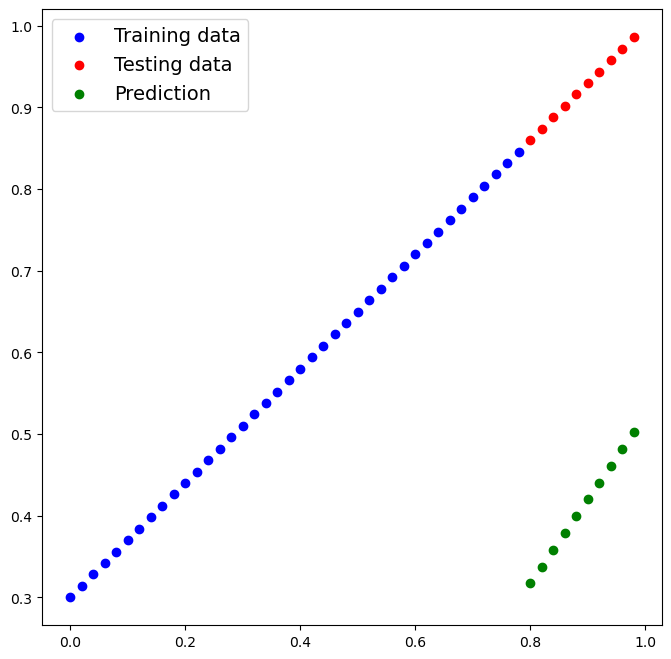

In [13]:
plot_preds(preds=pred_0)

In [14]:
y_test-pred_0

tensor([[0.5431],
        [0.5365],
        [0.5299],
        [0.5233],
        [0.5167],
        [0.5101],
        [0.5035],
        [0.4969],
        [0.4903],
        [0.4837]])

Till now, our model hasn't looked at the actual labels/outputs to be made. It just took a random values for weight and bias. We will be updating that.

### Training Model

We will pass out model to calculate Loss i.e. the deviation of predicted values from actual values. The loss functions are in torch.nn. 

Also, we will need an optimizer, it tells our model how to update it's parameters. It is in torch.optim.

In [15]:
loss_fx = nn.L1Loss() # L1Loss is Mean Average Loss i.e. Average of all pred-actual

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)  # it takes parameters like parameters to be updated and learning rate, (momentum?) 

##### Training Loop

**1. Forward Pass** -> model(X_train)

**2. Calculate Loss** -> loss = loss_fn(y_pred,y_train)

**3. Zero Gradients** -> optimizer.zero_grad()

**4. BackPropagation on Loss** -> loss.backward()

**5. Update optimizer** -> optimizer.step()

##### Testing Loop

**1. Forward Pass** -> model(X_test)

**2. Calculate Loss** -> loss = loss_fn(y_pred,y_test)

**3. Evaluate (optional)** -> custom functions for evaluation metrics such as accuracy or other losses


In [18]:
torch.manual_seed(19)

epochs = 100
training_losses = []
testing_losses = []
epoch_count = []

for epoch in range(epochs):
    
    # put model in training mode (by default a model is in training mode)
    model_0.train()

###########################
    
    #Training Loop

###########################  
  
# Forward pass
    train_pred = model_0(X_train)

# Calculate loss
    train_loss = loss_fx(train_pred,y_train)

# Zero grad (clear the accumulated gradient)
    optimizer.zero_grad()

# Compute gradients and backward propagate them  
    train_loss.backward()

# update the parameters with propagated gradients
    optimizer.step()

###########################
    
    #Testing Loop

###########################


    # Put model in evaluation mode
    model_0.eval()

    with torch.no_grad():
        # Forward pass
        test_pred = model_0(X_test)

    # Loss calculation
        test_loss = loss_fx(test_pred,y_test)

     # Print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        training_losses.append(train_loss.detach().numpy())
        testing_losses.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | MAE Train Loss: {train_loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.06019119173288345 | MAE Test Loss: 0.1396443396806717 
Epoch: 10 | MAE Train Loss: 0.056762706488370895 | MAE Test Loss: 0.1320587396621704 
Epoch: 20 | MAE Train Loss: 0.053326379507780075 | MAE Test Loss: 0.12378625571727753 
Epoch: 30 | MAE Train Loss: 0.0498892143368721 | MAE Test Loss: 0.11620068550109863 
Epoch: 40 | MAE Train Loss: 0.04646076261997223 | MAE Test Loss: 0.10792820155620575 
Epoch: 50 | MAE Train Loss: 0.04302274435758591 | MAE Test Loss: 0.09965569525957108 
Epoch: 60 | MAE Train Loss: 0.03958725184202194 | MAE Test Loss: 0.09207011759281158 
Epoch: 70 | MAE Train Loss: 0.036157917231321335 | MAE Test Loss: 0.0837976336479187 
Epoch: 80 | MAE Train Loss: 0.03271910920739174 | MAE Test Loss: 0.07552516460418701 
Epoch: 90 | MAE Train Loss: 0.029285306110978127 | MAE Test Loss: 0.06793956458568573 
